<div align="center">

# Análisis Estadístico sobre Cardilogía

## Análisis estadístico con Python
### Gabriel Romero
---

</div>

#### Importando librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report,roc_curve, auc
from scipy.stats import ttest_1samp
from sklearn.linear_model import LogisticRegression, LinearRegression

import warnings
warnings.filterwarnings('ignore')


---
#### 1. Carga los datos y explóralos. Elimina los datos nulos o incorrectos


In [2]:
file_path = 'cardio.csv'
data = pd.read_csv(file_path)
data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Exploración incial de los datos

In [3]:
data.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
data.shape

(4238, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [6]:
data.count()

sex                4238
age                4238
education          4133
currentSmoker      4238
cigsPerDay         4209
BPMeds             4185
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4188
sysBP              4238
diaBP              4238
BMI                4219
heartRate          4237
glucose            3850
TenYearCHD         4238
dtype: int64

In [7]:
data.apply(lambda x: sum(x.isnull()),axis =0)

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### Podemos observar que hay columnas con valores atipicos, se procede a transformación y remplazo de datos para limpiar

In [8]:
def procesar_datos(df):
    columns_cuant = []  # Para almacenar nombres de columnas cuantitativas
    columns_cual = []   # Para almacenar nombres de columnas cualitativas

    for column in df.columns:
        # Intentar limpiar y convertir la columna a numérico
        temp_col = df[column].astype(str).str.replace('%', '').str.replace(',', '').str.replace('$', '').str.strip()
        temp_col = pd.to_numeric(temp_col, errors='coerce')

        # Verificar si la columna convertida tiene una cantidad significativa de valores numéricos
        if temp_col.notna().sum() > 0.5 * len(df):  # Más del 50% debe ser numérico
            df[column] = temp_col  # Reemplazar con la versión limpia y convertida
            df[column] = df[column].fillna(df[column].mean())  # Rellenar NaN con el promedio
            columns_cuant.append(column)  # Añadir al listado de cuantitativas
        else:
            columns_cual.append(column)  # Añadir al listado de cualitativas si no es mayormente numérica

    return df, columns_cuant, columns_cual

# Aplicar la función al DataFrame
df_cleaned, columns_cuant, columns_cual = procesar_datos(data)

# Imprimir los resultados
print("Columnas Cuantitativas:", columns_cuant)
print("Columnas Cualitativas:", columns_cual)
df_cleaned.head()


Columnas Cuantitativas: ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
Columnas Cualitativas: ['sex', 'currentSmoker']


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [10]:
df_cleaned.count()

sex                4238
age                4238
education          4238
currentSmoker      4238
cigsPerDay         4238
BPMeds             4238
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4238
sysBP              4238
diaBP              4238
BMI                4238
heartRate          4238
glucose            4238
TenYearCHD         4238
dtype: int64

In [11]:
df_cleaned.apply(lambda x: sum(x.isnull()),axis =0)

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### Para manejar todos los datos de forma cuantitativa se cambiaen la columna sex F=0 y M=1 y en la columna currentSmoker No=0 y Yes=1

In [12]:
#Cambiar variables categóricas a numéricas
df_cleaned['sex'] = df_cleaned['sex'].map({'F': 0, 'M': 1})
df_cleaned['currentSmoker'] = df_cleaned['currentSmoker'].map({'No': 0, 'Yes': 1})
df_cleaned.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


---
#### 2.- Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?

### Análisis Descriptivo de Variables Cuantitativas

Las variables seleccionadas para el análisis son:

- **sysBP** - Presión arterial sistólica
- **totChol** - Nivel de colesterol total
- **BMI** - Índice de masa corporal

Para cada una de estas variables, realizaremos un análisis descriptivo que incluye los siguientes indicadores estadísticos:

- **Media**: Promedio de los valores.
- **Mediana**: Valor medio del conjunto de datos que divide el conjunto en dos partes iguales.
- **Desviación estándar**: Medida de la cantidad de variación o dispersión de un conjunto de valores.
- **Rango** (mínimo y máximo): Diferencia entre los valores máximo y mínimo.
- **Cuartiles**: Valores que dividen el conjunto de datos en cuatro partes iguales.

#### Visualización de la Distribución y Dispersión

Para cada variable, utilizaremos dos tipos de gráficos:

- **Histogramas**: Para visualizar la distribución de los datos.
- **Diagramas de caja (Boxplots)**: Para observar la dispersión y detectar valores atípicos.

Estos gráficos ayudarán a comprender mejor la distribución y la variabilidad de los datos, permitiéndonos identificar cuál de las variables presenta mayor dispersión.



             sysBP      totChol          BMI
count  4238.000000  4238.000000  4238.000000
mean    132.352407   236.721585    25.802008
std      22.038097    44.326453     4.070953
min      83.500000   107.000000    15.540000
25%     117.000000   206.000000    23.080000
50%     128.000000   234.000000    25.410000
75%     144.000000   262.000000    28.037500
max     295.000000   696.000000    56.800000


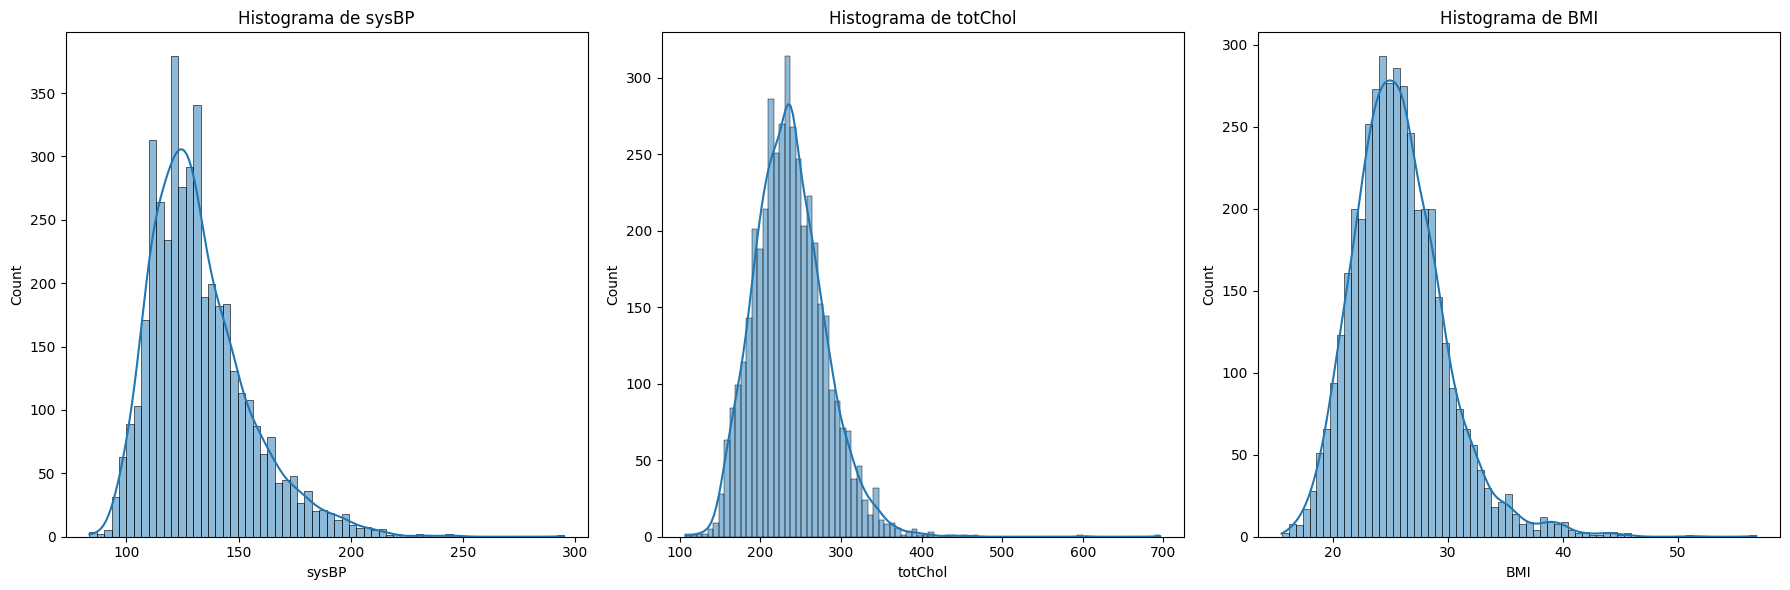

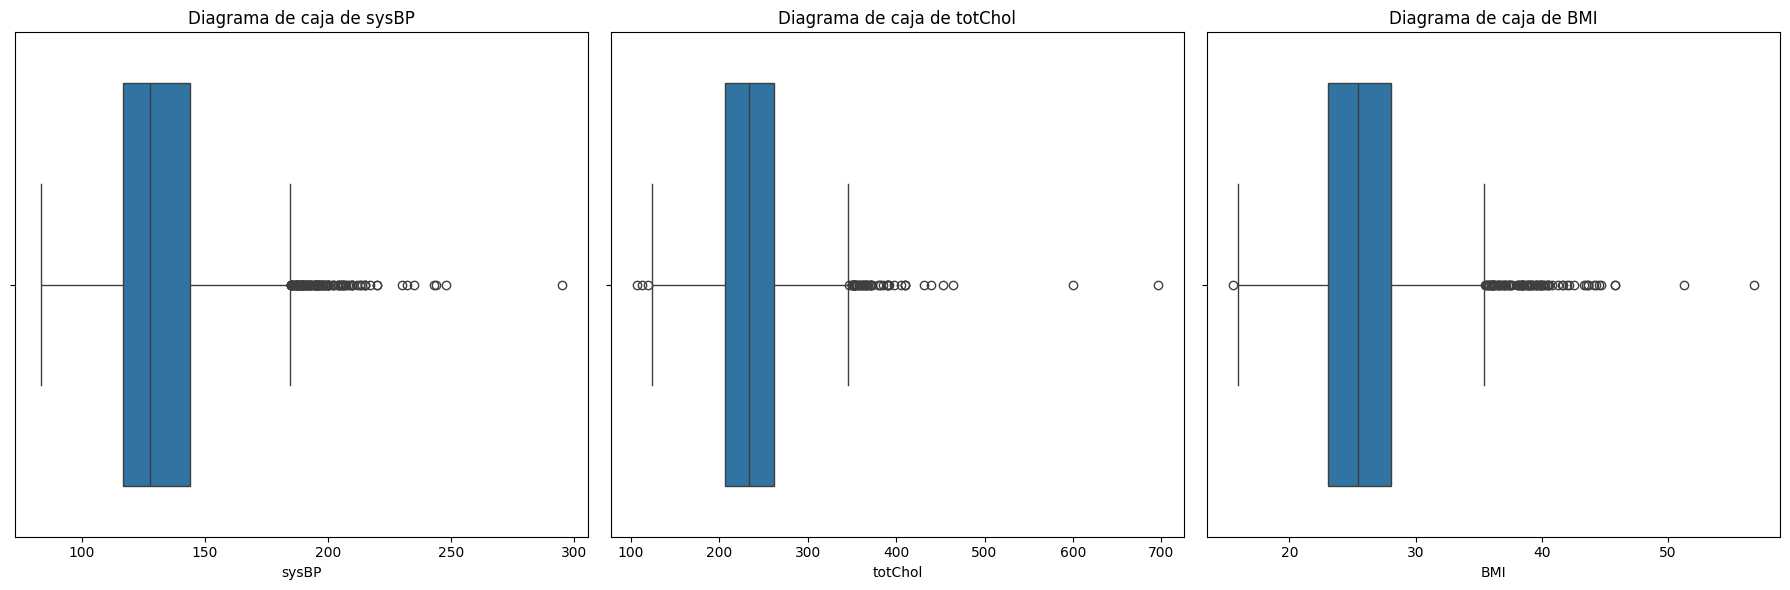

Desviación estándar:
sysBP      22.038097
totChol    44.326453
BMI         4.070953
dtype: float64


In [13]:
# Asumimos que df_cleaned ya contiene los datos limpios y cargados
variables = ['sysBP', 'totChol', 'BMI']  # Lista de variables cuantitativas

# Estadística Descriptiva
desc_stats = df_cleaned[variables].describe()
print(desc_stats)

# Generando Histogramas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Configura un layout de 1x3 para los gráficos
for i, var in enumerate(variables):
    sns.histplot(df_cleaned[var], ax=axes[i], kde=True)  # Genera un histograma con KDE
    axes[i].set_title(f'Histograma de {var}')  # Establece el título para cada histograma
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para dar espacio entre los gráficos
plt.show()

# Diagramas de caja
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Configura un layout de 1x3 para los gráficos
for i, var in enumerate(variables):
    sns.boxplot(x=df_cleaned[var], ax=axes[i])  # Genera un boxplot para cada variable
    axes[i].set_title(f'Diagrama de caja de {var}')  # Establece el título para cada boxplot
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot
plt.show()

# Cálculo de la dispersión con la desviación estándar
print("Desviación estándar:")
print(df_cleaned[variables].std())



### Análisis de Dispersión de Variables Cuantitativas

Basándonos en las gráficas y los datos estadísticos proporcionados, podemos determinar cuál de las variables tiene mayor dispersión examinando la desviación estándar de cada una. Aquí están los valores de desviación estándar para las variables seleccionadas:

- **sysBP (presión arterial sistólica):** 22.038
- **totChol (nivel de colesterol total):** 44.326
- **BMI (índice de masa corporal):** 4.071

De estas, la variable `totChol` presenta la mayor desviación estándar, lo que indica que tiene la mayor dispersión entre las tres variables analizadas. Además, en el diagrama de caja de `totChol`, podemos observar que el rango intercuartil es más amplio y hay varios valores atípicos, lo que refuerza la observación de una mayor dispersión.

Esta observación sugiere que `totChol` podría ser una variable especialmente significativa para investigar más a fondo debido a su variabilidad en la población estudiada, posiblemente indicando diferentes riesgos de salud relacionados con el colesterol que podrían ser cruciales para intervenciones preventivas o tratamientos específicos.


---

#### 3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio"

Para eliminar los datos atípicos (outliers) del dataset, podemos utilizar un método basado en el rango intercuartílico (IQR). Este método es efectivo y comúnmente usado. El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los valores que están fuera del rango [Q1 - 1.5IQR, Q3 + 1.5IQR] se consideran atípicos.

In [14]:
# Supongamos que df_cleaned es tu DataFrame ya limpio y cargado
def eliminar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        filtro = (df[columna] >= (Q1 - 1.5 * IQR)) & (df[columna] <= (Q3 + 1.5 * IQR))
        df = df.loc[filtro]
    return df

# Columnas en las que deseamos eliminar outliers
columnas = ['sysBP', 'totChol', 'BMI']

# Aplicar la función al DataFrame
df_sin_outliers = eliminar_outliers(df_cleaned, columnas)

# Mostrar las primeras filas del nuevo DataFrame sin outliers
print(df_sin_outliers.head())


   sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2       

### Mostrando graficamente la eliminación de los datos atipicos (Outlers)

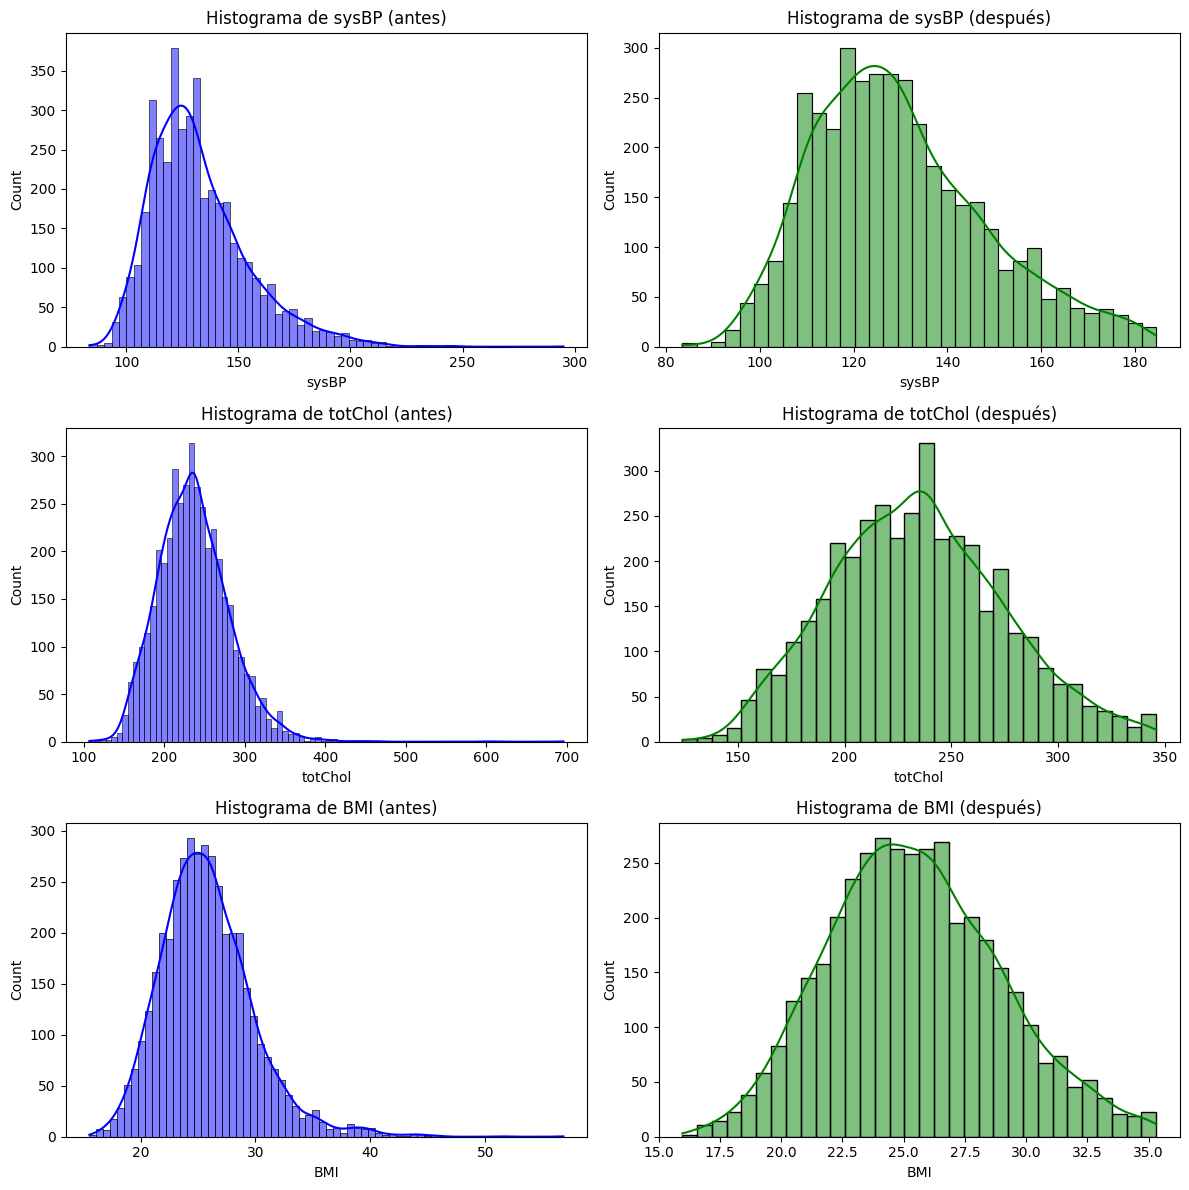

In [15]:
def graficar_antes_despues(df_antes, df_despues, columnas):
    fig, axes = plt.subplots(len(columnas), 2, figsize=(12, len(columnas) * 4))

    for i, columna in enumerate(columnas):
        # Histogramas antes de la eliminación de outliers
        sns.histplot(df_antes[columna], ax=axes[i, 0], kde=True, color='blue')
        axes[i, 0].set_title(f'Histograma de {columna} (antes)')

        # Histogramas después de la eliminación de outliers
        sns.histplot(df_despues[columna], ax=axes[i, 1], kde=True, color='green')
        axes[i, 1].set_title(f'Histograma de {columna} (después)')

        # Mejora en la distribución del espacio entre los gráficos
        plt.tight_layout()

    # Mostrar los gráficos
    plt.show()

# Columnas de interés
columnas = ['sysBP', 'totChol', 'BMI']

# Suponiendo que df_cleaned es el DataFrame antes de la eliminación y df_sin_outliers después
graficar_antes_despues(df_cleaned, df_sin_outliers, columnas)


---
#### 4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.

### Identificación de Variables Cuantitativas con Mayor Correlación

Para determinar qué variables cuantitativas presentan la mayor correlación en tu conjunto de datos, puedes utilizar el coeficiente de correlación de Pearson. Este coeficiente mide la relación lineal entre dos variables y puede variar entre -1 y 1, donde:

- Un valor **cercano a 1** indica una **fuerte correlación positiva**.
- Un valor **cercano a -1** indica una **fuerte correlación negativa**.
- Un valor **cercano a 0** sugiere que **no hay una correlación lineal significativa**.

#### Proceso para Calcular la Matriz de Correlación

Usando Python y la biblioteca `pandas`, puedes calcular fácilmente la matriz de correlación para todas las variables cuantitativas de tu DataFrame. Posteriormente, puedes visualizar esta matriz utilizando `seaborn`, lo que facilita la interpretación de las correlaciones entre las variables.


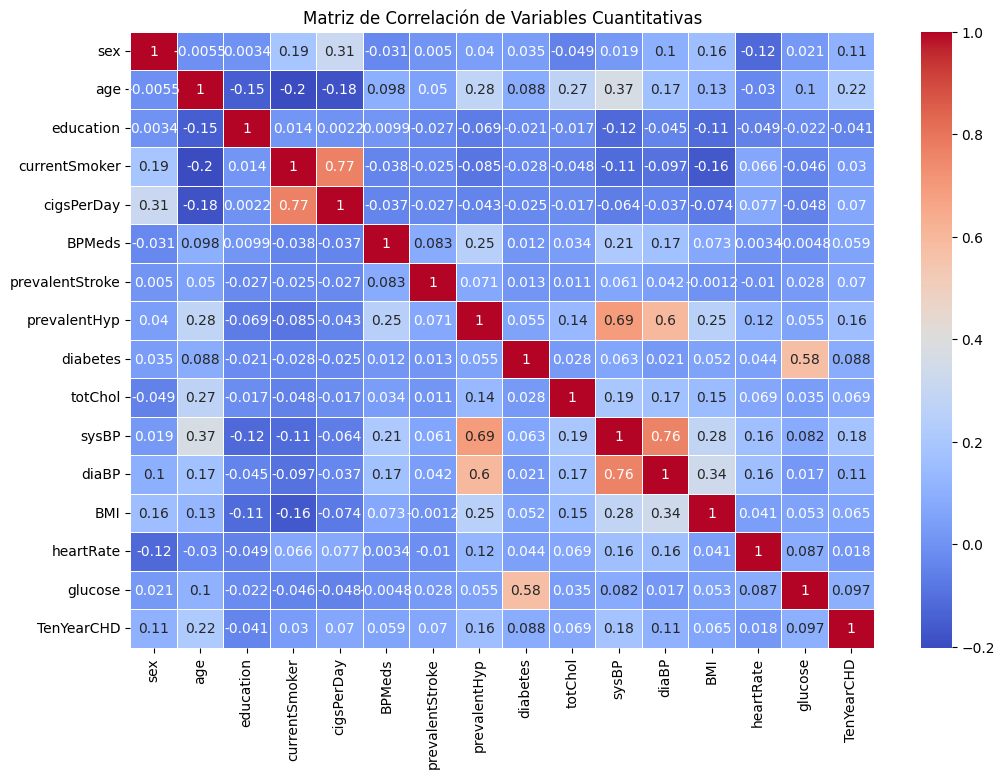

currentSmoker  cigsPerDay       0.765437
cigsPerDay     currentSmoker    0.765437
sysBP          diaBP            0.763766
diaBP          sysBP            0.763766
prevalentHyp   sysBP            0.692879
sysBP          prevalentHyp     0.692879
prevalentHyp   diaBP            0.596266
diaBP          prevalentHyp     0.596266
diabetes       glucose          0.577368
glucose        diabetes         0.577368
dtype: float64


In [16]:
# Suponiendo que df_sin_outliers es tu DataFrame limpio sin outliers
# Trabajamos solo con columnas numéricas
data_num = df_sin_outliers.select_dtypes(include=[float, int])

# Calcular la matriz de correlación con los datos numéricos
correlation_matrix = data_num.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()

# Identificar los pares de variables con mayor correlación
# Primero descomponer la matriz para crear pares de correlaciones
corr_pairs = correlation_matrix.unstack().dropna()

# Filtrar los pares para que no sean autocorrelaciones y tengan valores significativos
significant_corr_pairs = corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.5)]

# Ordenar los pares de correlaciones en orden descendente de valor absoluto
significant_corr_pairs_sorted = significant_corr_pairs.sort_values(kind="quicksort", ascending=False)

# Mostrar los resultados
print(significant_corr_pairs_sorted)


### Análisis de Correlaciones Significativas

En la matriz de correlación observada, se identificaron varias relaciones fuertes entre distintas variables cuantitativas y cualitativas. Las correlaciones más altas son típicamente indicadas por colores intensos, rojos para correlaciones positivas y azules para correlaciones negativas.

Aquí destacamos las correlaciones más significativas entre las variables cuantitativas:

1. **currentSmoker y cigsPerDay (0.764537)**: Existe una correlación positiva muy alta entre ser fumador actual (`currentSmoker`) y el número de cigarrillos consumidos por día (`cigsPerDay`). Esto es esperable, ya que los individuos que fuman tienden a consumir una cantidad específica de cigarrillos regularmente.

2. **sysBP y prevalentHyp (0.696)**: Hay una fuerte correlación entre la presión arterial sistólica (`sysBP`) y la prevalencia de hipertensión (`prevalentHyp`). Este hallazgo es coherente con la definición de hipertensión, que implica tener una presión arterial elevada de manera crónica.

3. **diaBP y prevalentHyp (0.616)**: Similarmente, existe una asociación significativa entre la presión arterial diastólica (`diaBP`) y la prevalencia de hipertensión.

Estas correlaciones subrayan las conexiones directas entre comportamientos y condiciones de salud específicos, como el tabaquismo y su impacto en el número de cigarrillos consumidos, así como la relación entre diferentes medidas de presión arterial y la hipertensión. 

Estos descubrimientos son cruciales para comprender los factores de riesgo asociados con enfermedades específicas y pueden ser fundamentales para dirigir intervenciones clínicas y formular políticas de salud pública. Además, estas fuertes correlaciones sugieren áreas para investigaciones más profundas sobre causas, efectos y tratamientos en estudios de salud.

---
#### 5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?

In [17]:
# Asumiendo que 'df_sin_outliers' es tu DataFrame y que 'sex' y 'BMI' son las columnas relevantes
# Filtrar pacientes en el mayor cuartil de BMI
bmi_cuartil = df_sin_outliers['BMI'].quantile(0.75)  # Calcular el tercer cuartil de BMI
high_bmi = df_sin_outliers[df_sin_outliers['BMI'] > bmi_cuartil]  # Filtrar para obtener solo aquellos en el cuartil superior

# Probabilidad de ser hombre dado que el BMI está en el mayor cuartil
prob_hombre = high_bmi['sex'].value_counts(normalize=True).get('M', 0)
print(f'Probabilidad de ser hombre en el mayor cuartil de BMI: {prob_hombre:.2f}')


Probabilidad de ser hombre en el mayor cuartil de BMI: 0.00


---
#### 6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.

In [18]:
# Prueba t para comparar la media de heartRate con 75
t_stat, p_value = ttest_1samp(df_sin_outliers['heartRate'], 75)

print(f'Estadístico t: {t_stat:.2f}, valor p: {p_value:.4f}')

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: el ritmo cardíaco promedio no es 75.")
else:
    print("No se puede rechazar la hipótesis nula: el ritmo cardíaco promedio es 75.")


Estadístico t: 2.90, valor p: 0.0038
Rechazamos la hipótesis nula: el ritmo cardíaco promedio no es 75.


### Análisis de Resultados de la Prueba t de Una Muestra

Los resultados obtenidos de la prueba t de una muestra sugieren que el ritmo cardíaco promedio de la población estudiada es estadísticamente diferente de 75. A continuación, se detallan los resultados y su interpretación:

- **Estadístico t**: 2.90
- **Valor p**: 0.0038

### Interpretación de los Resultados

- **Estadístico t**: El valor de 2.90 indica la distancia en desviaciones estándar entre la media observada de la muestra y el valor hipotético de 75.
- **Valor p**: Un valor p de 0.0038 indica la probabilidad de obtener un resultado tan extremo como el observado, o más, si la hipótesis nula fuera cierta. En este contexto, la hipótesis nula afirma que el ritmo cardíaco promedio es 75.

### Justificación para Rechazar la Hipótesis Nula

Dado que el valor p (0.0038) es menor que el umbral común de 0.05, los resultados son estadísticamente significativos, lo que implica una fuerte evidencia para rechazar la hipótesis nula. Esto sugiere que el ritmo cardíaco promedio en la muestra estudiada no es 75.

### Implicaciones Clínicas y de Investigación

- **Relevancia Clínica**: El rechazo de la hipótesis nula puede indicar diferencias significativas en el estado de salud o en los factores de estilo de vida de la población estudiada en comparación con otras poblaciones cuyo ritmo cardíaco promedio podría ser 75.
- **Consideraciones para la Salud**: Variaciones en el ritmo cardíaco promedio podrían tener implicaciones para la evaluación del riesgo de condiciones de salud cardiovascular, entre otras.
- **Direcciones Futuras para la Investigación**: Los resultados pueden motivar estudios adicionales para explorar qué factores podrían estar contribuyendo a esta diferencia en el ritmo cardíaco promedio, como la actividad física, la dieta, el estrés o condiciones médicas.

Este análisis resalta la importancia de considerar las características específicas de la muestra al interpretar indicadores de salud y diseñar intervenciones clínicas adecuadas.

---
#### 7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.

In [19]:
import pandas as pd
from scipy.stats import ttest_ind

# Asumiendo que 'df_sin_outliers' es tu DataFrame
# Filtrar solo pacientes fumadores
fumadores = df_sin_outliers[df_sin_outliers['currentSmoker'] == 1]

# Calcula el promedio de cigarrillos diarios por sexo, utilizando groupby para dividir los datos en hombres (sex = 1) y mujeres (sex = 0)
promedio_cigs = fumadores.groupby('sex')['cigsPerDay'].mean()
print(promedio_cigs)

# Para determinar si la diferencia en el promedio de cigarrillos entre hombres y mujeres es estadísticamente significativa, se aplica una prueba T de muestras independientes
t_stat, p_value = ttest_ind(
    fumadores[fumadores['sex'] == 1]['cigsPerDay'],
    fumadores[fumadores['sex'] == 0]['cigsPerDay']
)

print(f'Estadístico t: {t_stat:.2f}, valor p: {p_value:.4f}')

# Interpretar los resultados
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en el número de cigarrillos por día entre hombres y mujeres.")
else:
    print("No se puede rechazar la hipótesis nula: No existe diferencia significativa en el número de cigarrillos por día entre hombres y mujeres.")


sex
0    14.094091
1    22.036387
Name: cigsPerDay, dtype: float64
Estadístico t: 17.44, valor p: 0.0000
Rechazamos la hipótesis nula: Existe una diferencia significativa en el número de cigarrillos por día entre hombres y mujeres.


### Explicación Detallada de los Resultados:

#### Promedio de Cigarrillos por Día:

- **Mujeres (sex = 0)**: El promedio es de aproximadamente 14.09 cigarrillos por día.
- **Hombres (sex = 1)**: El promedio es de aproximadamente 22.04 cigarrillos por día.

#### Estadístico t y Valor p:

- **Estadístico t**: 17.44
- **Valor p**: 0.0000

### Interpretación:

- **Estadístico t**: El valor alto de t (17.44) indica una diferencia sustancial en las medias entre los dos grupos. Dado que el valor es positivo, sugiere que la media del grupo de hombres es mayor que la del grupo de mujeres.

- **Valor p**: Un valor p extremadamente bajo (reportado aquí como 0.0000, lo que puede representar un valor menor que 0.0001) indica que la probabilidad de observar una diferencia tan extrema o más en las medias de cigarrillos por día entre hombres y mujeres, si en realidad no hubiera diferencia (es decir, si la hipótesis nula fuera cierta), es prácticamente nula.

### Conclusión:

Rechazo de la Hipótesis Nula: Dado que el valor p es significativamente menor que el umbral común de 0.05, rechazamos la hipótesis nula. Esto significa que hay evidencia estadística suficiente para afirmar que existe una diferencia significativa en el número de cigarrillos fumados por día entre hombres y mujeres en la muestra analizada.

---
#### 8. Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal. (Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.

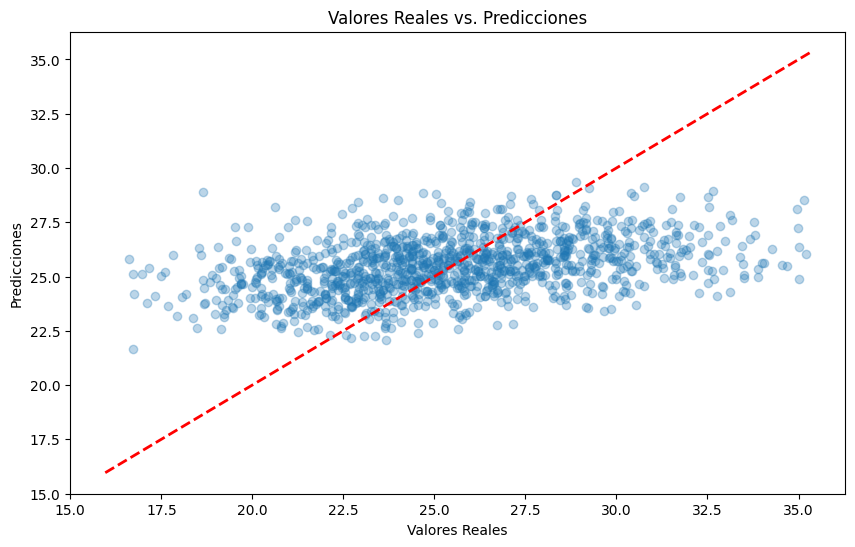

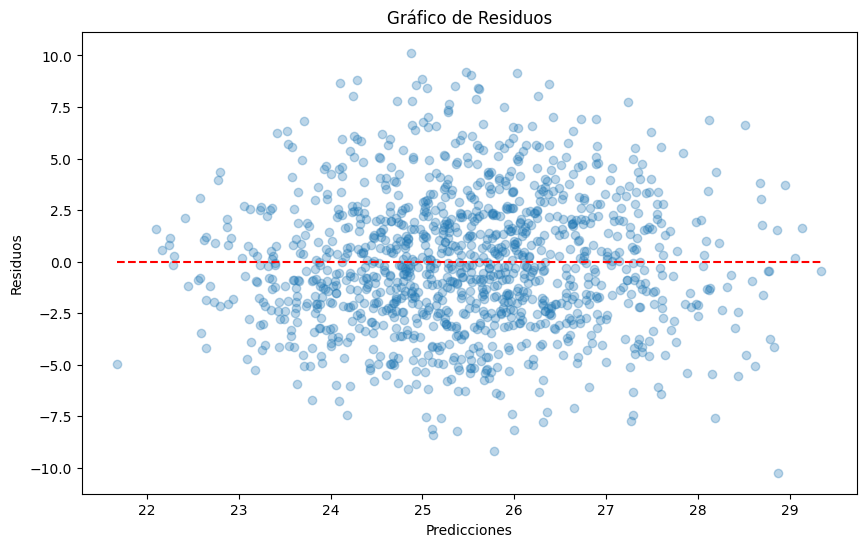

Error cuadrático medio (MSE): 10.69
Coeficiente de determinación (R²): 0.15


In [20]:
# Suponiendo que 'df_sin_outliers' es tu DataFrame ya limpio y sin valores atípicos
# Variables predictoras y objetivo
X = pd.get_dummies(df_sin_outliers[['age', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'sex']], drop_first=True)
y = df_sin_outliers['BMI']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')

# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')

plt.show()

print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R²): {r2:.2f}')


### Gráfico de Valores Reales vs. Predicciones

Este gráfico muestra los valores predichos por el modelo en comparación con los valores reales del BMI.

- **Visualización**: Cada punto en el gráfico representa una observación del conjunto de prueba. El eje x muestra los valores reales del BMI, y el eje y muestra los valores predichos por el modelo.
- **Línea de Perfección**: La línea roja punteada representa la relación perfecta entre los valores reales y los valores predichos. Si un punto se encuentra sobre esta línea, indica que la predicción fue exacta para ese valor.
- **Interpretación**: Cuanto más cercanas estén los puntos a esta línea roja, más precisas son las predicciones del modelo. Una mayor dispersión de los puntos alrededor de la línea indica una mayor variabilidad en las predicciones.

### Gráfico de Residuos

Este gráfico muestra los residuos, que son las diferencias entre los valores reales del BMI y los valores predichos por el modelo, en relación con las predicciones.

- **Visualización**: Los residuos se plotean en el eje y, y los valores predichos en el eje x.
- **Línea Horizontal en y=0**: Una línea horizontal roja en y=0 indica el punto donde los residuos son cero. Los residuos positivos indican que el modelo subestima el valor real, mientras que los residuos negativos indican una sobreestimación.
- **Interpretación**: Idealmente, los residuos deben distribuirse aleatoriamente alrededor de la línea horizontal y no mostrar ningún patrón. La presencia de patrones o una forma sistemática en la distribución de residuos podría indicar problemas con el modelo, como heteroscedasticidad o sesgos no capturados por el modelo.

---
#### 9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años, a partir de las variables descritas. Verifica el balanceo de datos y evalúa tu modelo.

TenYearCHD
0    0.85743
1    0.14257
Name: proportion, dtype: float64


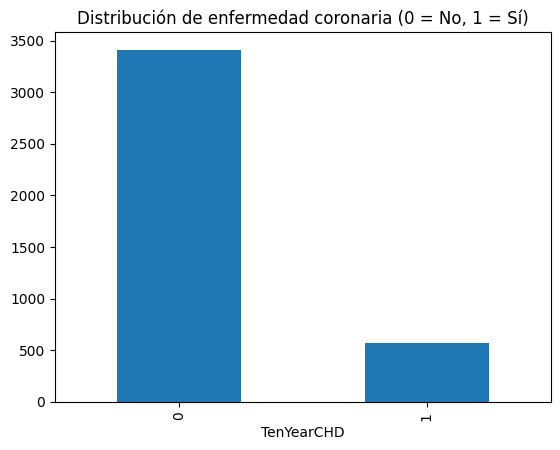

[[1013    5]
 [ 168    8]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1018
           1       0.62      0.05      0.08       176

    accuracy                           0.86      1194
   macro avg       0.74      0.52      0.50      1194
weighted avg       0.82      0.86      0.80      1194



In [21]:
#Se entrena un modelo de regresión logística para predecir el riesgo de enfermedad coronaria en los próximos diez años.

# Preparación de datos
X = pd.get_dummies(df_sin_outliers[['age', 'sysBP', 'diaBP', 'glucose', 'totChol', 'sex']], drop_first=True)
y = df_sin_outliers['TenYearCHD']

# Verificación del balanceo de la variable objetivo
print(y.value_counts(normalize=True))
y.value_counts().plot(kind='bar', title='Distribución de enfermedad coronaria (0 = No, 1 = Sí)')
plt.show()

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión logística
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_log = modelo_log.predict(X_test)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



### Distribución de la Variable Objetivo

La proporción de los casos en la muestra es muy desequilibrada con aproximadamente 85.7% de los casos etiquetados como "0" (no riesgo) y solo 14.3% como "1" (riesgo). Esto indica un desbalance significativo en la variable objetivo.

### Evaluación del Modelo

La matriz de confusión y el informe de clasificación muestran el desempeño del modelo. La matriz de confusión `[1013, 5; 168, 8]` indica que el modelo predice predominantemente la clase mayoritaria (no riesgo), con 1013 verdaderos negativos y 8 verdaderos positivos. Sin embargo, el modelo tiene dificultades para identificar correctamente los casos positivos, como se evidencia por los 168 falsos negativos y la baja cantidad de verdaderos positivos (8).

---
#### 10. Separa los modelos de regresión anteriores en dos distintos, respectivamente, considerando alguna variable categórica. Compara y concluye.

In [22]:
# División del dataset por sexo
hombres = df_sin_outliers[df_sin_outliers['sex'] == 1]
mujeres = df_sin_outliers[df_sin_outliers['sex'] == 0]

# Variables predictoras y objetivo
X_hombres = hombres[['age', 'sysBP', 'diaBP', 'glucose', 'totChol']]
y_hombres = hombres['TenYearCHD']
X_mujeres = mujeres[['age', 'sysBP', 'diaBP', 'glucose', 'totChol']]
y_mujeres = mujeres['TenYearCHD']

# División en conjuntos de entrenamiento y prueba para cada grupo
X_train_hombres, X_test_hombres, y_train_hombres, y_test_hombres = train_test_split(
    X_hombres, y_hombres, test_size=0.3, random_state=42
)
X_train_mujeres, X_test_mujeres, y_train_mujeres, y_test_mujeres = train_test_split(
    X_mujeres, y_mujeres, test_size=0.3, random_state=42
)

# Entrenamiento del modelo para hombres
modelo_hombres = LogisticRegression(max_iter=1000)
modelo_hombres.fit(X_train_hombres, y_train_hombres)

# Entrenamiento del modelo para mujeres
modelo_mujeres = LogisticRegression(max_iter=1000)
modelo_mujeres.fit(X_train_mujeres, y_train_mujeres)

# Predicciones y evaluación para hombres
y_pred_hombres = modelo_hombres.predict(X_test_hombres)
print("Matriz de confusión para hombres:")
print(confusion_matrix(y_test_hombres, y_pred_hombres))
print("Reporte de clasificación para hombres:")
print(classification_report(y_test_hombres, y_pred_hombres))

# Predicciones y evaluación para mujeres
y_pred_mujeres = modelo_mujeres.predict(X_test_mujeres)
print("Matriz de confusión para mujeres:")
print(confusion_matrix(y_test_mujeres, y_pred_mujeres))
print("Reporte de clasificación para mujeres:")
print(classification_report(y_test_mujeres, y_pred_mujeres))


Matriz de confusión para hombres:
[[422   6]
 [ 95   5]]
Reporte de clasificación para hombres:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       428
           1       0.45      0.05      0.09       100

    accuracy                           0.81       528
   macro avg       0.64      0.52      0.49       528
weighted avg       0.75      0.81      0.74       528

Matriz de confusión para mujeres:
[[594   0]
 [ 72   0]]
Reporte de clasificación para mujeres:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       594
           1       0.00      0.00      0.00        72

    accuracy                           0.89       666
   macro avg       0.45      0.50      0.47       666
weighted avg       0.80      0.89      0.84       666



### Representación grafica de la matriz de confusión

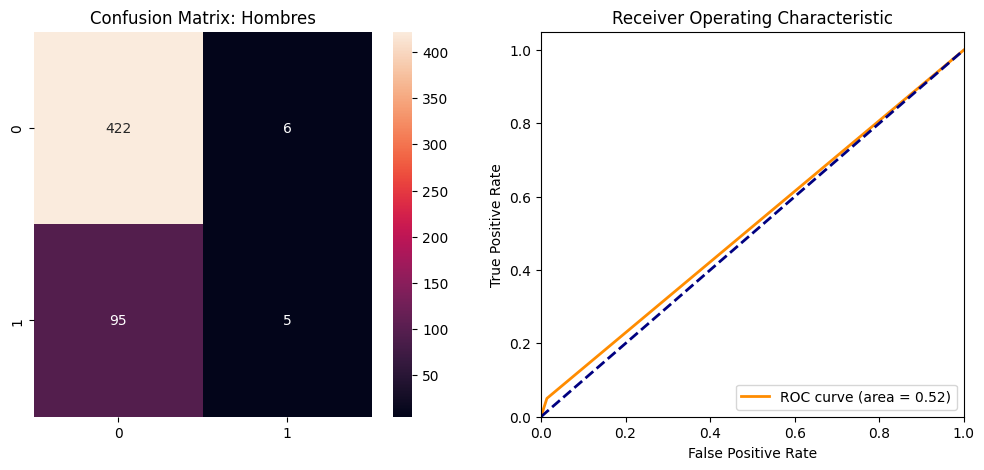

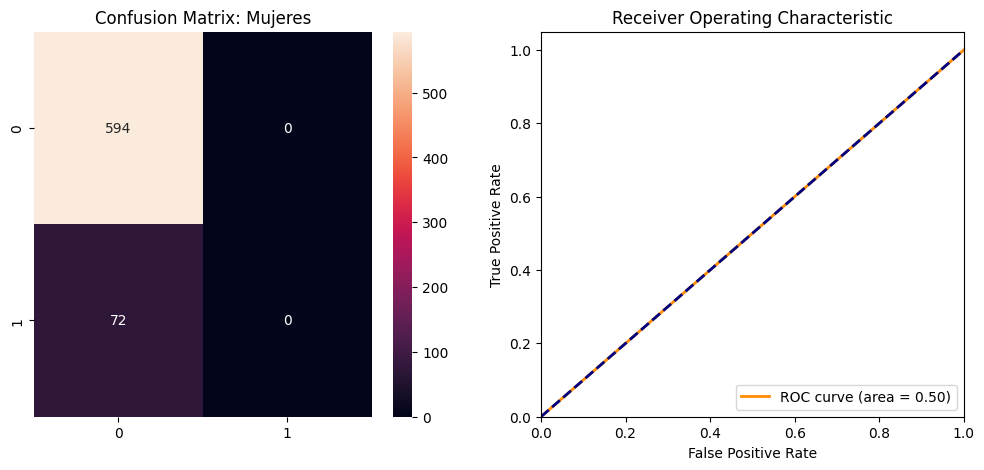

In [23]:

# Función para calcular métricas y graficarlas
def plot_metrics(y_test, y_pred, model_name):
    f, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[0])
    axes[0].set_title(f"Confusion Matrix: {model_name}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic')
    axes[1].legend(loc="lower right")

    plt.show()

# Llamada a la función para ambos modelos
plot_metrics(y_test_hombres, y_pred_hombres, "Hombres")
plot_metrics(y_test_mujeres, y_pred_mujeres, "Mujeres")


## Conclusiones de las Matrices de Confusión

### Hombres:

- **Verdaderos Negativos (VN)**: 422
- **Falsos Positivos (FP)**: 6
- **Falsos Negativos (FN)**: 95
- **Verdaderos Positivos (VP)**: 5

La matriz para los hombres muestra que el modelo es eficiente en predecir negativos (no riesgo), pero lucha significativamente para identificar positivos (riesgo real), como lo indican los 95 falsos negativos y solo 5 verdaderos positivos.

### Mujeres:

- **Verdaderos Negativos (VN)**: 594
- **Falsos Positivos (FP)**: 0
- **Falsos Negativos (FN)**: 72
- **Verdaderos Positivos (VP)**: 0

Para las mujeres, el modelo no identificó correctamente ningún caso positivo (riesgo real), con todos los casos de riesgo siendo clasificados incorrectamente como no riesgo (72 falsos negativos). Esto indica una posible necesidad de revisar el modelo o considerar más variables o interacciones específicas que afecten a las mujeres.

## Conclusiones de las Curvas ROC

- **Hombres**: El área bajo la curva (AUC) es de 0.52, indicando un desempeño apenas mejor que el azar.
- **Mujeres**: El AUC de 0.50 es esencialmente aleatorio, lo que refuerza que el modelo no tiene capacidad predictiva para este grupo.

---